# Objective 

**The goal of this data analysis project using sql would be to identify opportunities to increase the occupancy rate on low performing flights, 
which can ultimately lead to increased profitability for the airline.**

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

C:\Users\adars\AppData\Roaming\Python\Python311\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Connection

In [2]:

connection=sqlite3.connect('travel.sqlite')
cursor=connection.cursor()

In [3]:
cursor.execute("""select name from sqlite_master where type='table';""")
print('List of tables present in database:')
table_list=[table[0] for table in cursor.fetchall()]
print(table_list)

List of tables present in database:
['aircrafts_data', 'airports_data', 'boarding_passes', 'bookings', 'flights', 'seats', 'ticket_flights', 'tickets']


In [4]:
# Data Exploration
aircraft_data=pd.read_sql_query("select * from aircrafts_data",connection)
aircraft_data.head()


,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [5]:
airports_data=pd.read_sql_query("select * from airports_data",connection)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [6]:
boarding_passes=pd.read_sql_query("select * from boarding_passes",connection)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [7]:
bookings=pd.read_sql_query("select * from bookings",connection)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [8]:
flights=pd.read_sql_query("select * from flights",connection)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [9]:
seats=pd.read_sql_query("select * from seats",connection)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [10]:
ticket_flights=pd.read_sql_query("select * from ticket_flights",connection)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [11]:
tickets=pd.read_sql_query("select * from tickets",connection)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


In [12]:
for table in table_list:
    print(f'\nTable: {table}')
    column_info=connection.execute(f"PRAGMA table_info ({table})")
    for column in column_info.fetchall():
        print(column)


Table: aircrafts_data
(0, 'aircraft_code', 'character(3)', 1, None, 0)
(1, 'model', 'jsonb', 1, None, 0)
(2, 'range', 'INTEGER', 1, None, 0)

Table: airports_data
(0, 'airport_code', 'character(3)', 1, None, 0)
(1, 'airport_name', 'jsonb', 1, None, 0)
(2, 'city', 'jsonb', 1, None, 0)
(3, 'coordinates', 'point', 1, None, 0)
(4, 'timezone', 'TEXT', 1, None, 0)

Table: boarding_passes
(0, 'ticket_no', 'character(13)', 1, None, 0)
(1, 'flight_id', 'INTEGER', 1, None, 0)
(2, 'boarding_no', 'INTEGER', 1, None, 0)
(3, 'seat_no', 'character varying(4)', 1, None, 0)

Table: bookings
(0, 'book_ref', 'character(6)', 1, None, 0)
(1, 'book_date', 'timestamp with time zone', 1, None, 0)
(2, 'total_amount', 'numeric(10,2)', 1, None, 0)

Table: flights
(0, 'flight_id', 'INTEGER', 1, None, 0)
(1, 'flight_no', 'character(6)', 1, None, 0)
(2, 'scheduled_departure', 'timestamp with time zone', 1, None, 0)
(3, 'scheduled_arrival', 'timestamp with time zone', 1, None, 0)
(4, 'departure_airport', 'character

In [13]:
for table in table_list:
    print(f'\nTable:{table}')
    df_table=pd.read_sql_query(f"select * from {table}",connection)
    print(df_table.isnull().sum())


Table:aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

Table:airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

Table:boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

Table:bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

Table:flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

Table:seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

Table:ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

Table:tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


**How many planes have more than 100 seats?**

In [14]:

pd.read_sql_query("""select aircraft_code,count(*) as num_seats from seats
                    group by aircraft_code having num_seats > 100""",connection)

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


**How the number of tickets booked and total amount earned changed with the time**

In [15]:
tickets=pd.read_sql_query("""select * from tickets inner join bookings
                    on tickets.book_ref=bookings.book_ref""",connection)

tickets['book_data']=pd.to_datetime(tickets['book_date'])
tickets['date']=tickets['book_data'].dt.date
tickets

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,book_data,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03,12400,2017-07-05 20:19:00+03:00,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03,12400,2017-07-05 20:19:00+03:00,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03,24700,2017-06-29 01:55:00+03:00,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03,24700,2017-06-29 01:55:00+03:00,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03,30900,2017-07-03 04:37:00+03:00,2017-07-03
...,...,...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03,210600,2017-08-14 11:50:00+03:00,2017-08-14
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03,210600,2017-08-14 11:50:00+03:00,2017-08-14
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03,45900,2017-08-13 03:49:00+03:00,2017-08-13
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03,219400,2017-08-15 15:54:00+03:00,2017-08-15


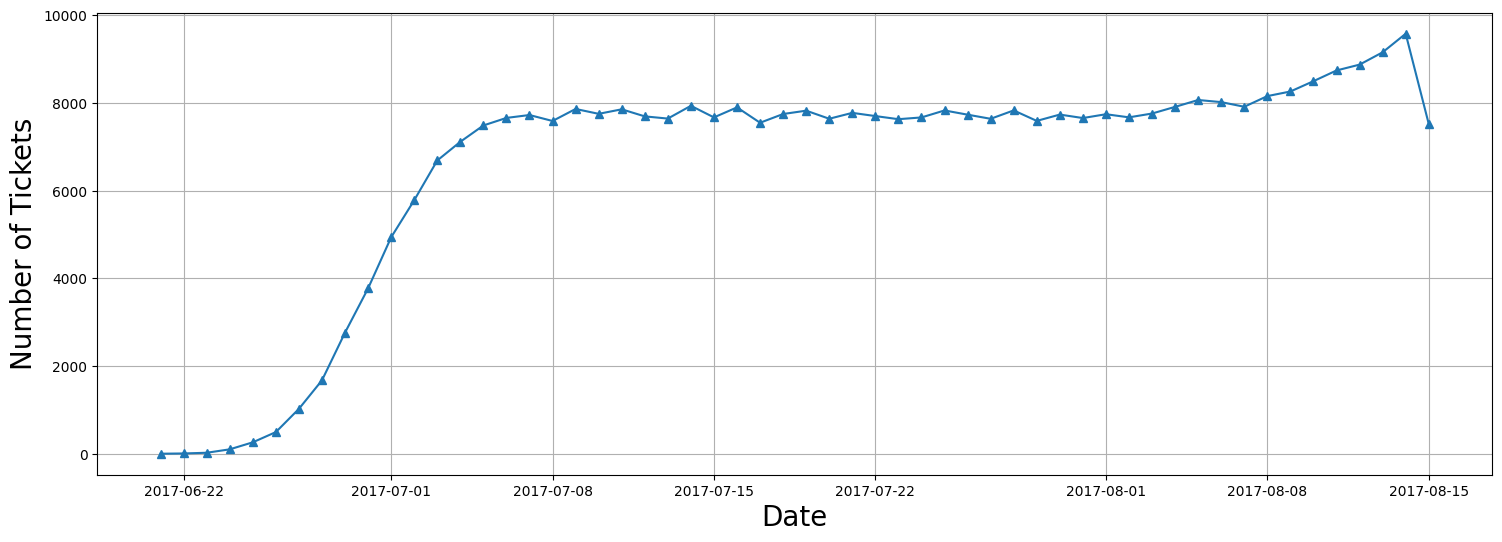

In [16]:
x=tickets.groupby('date')[['date']].count()
plt.figure(figsize=(18,6))
plt.plot(x.index,x['date'],marker='^')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Number of Tickets',fontsize=20)
plt.grid('b')
plt.show()

In [17]:
bookings=pd.read_sql_query("select * from bookings",connection)
bookings['book_data']=pd.to_datetime(bookings['book_date'])
bookings['date']=bookings['book_data'].dt.date

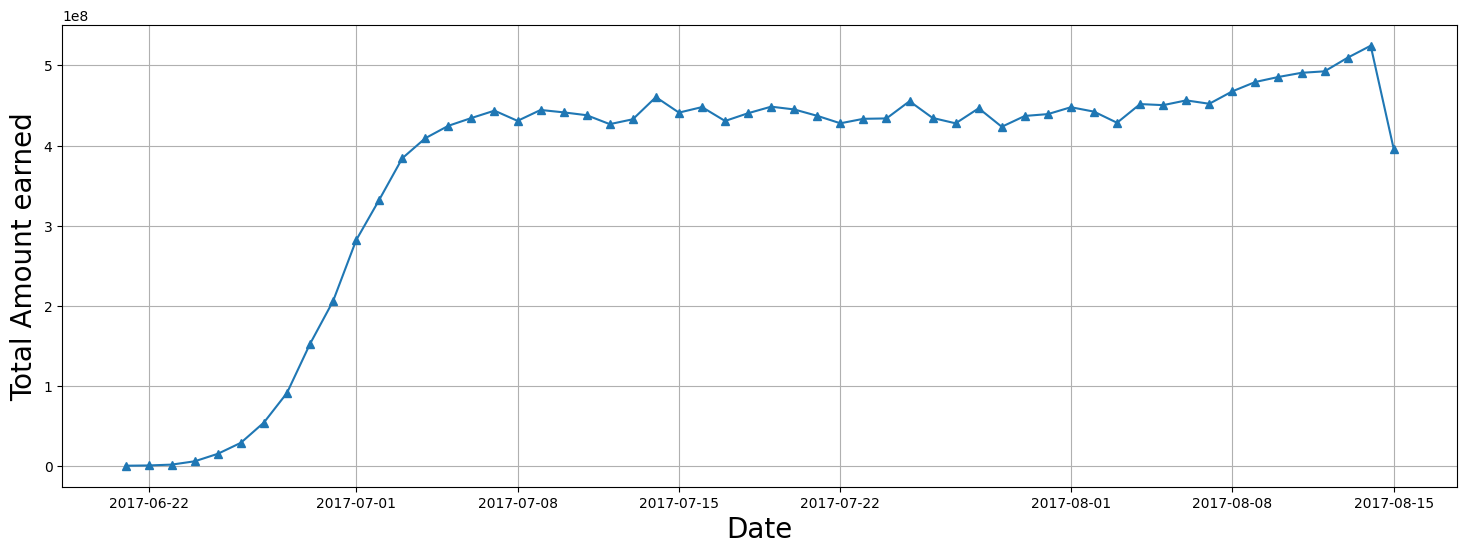

In [18]:
x=bookings.groupby('date')[['total_amount']].sum()
plt.figure(figsize=(18,6))
plt.plot(x.index,x['total_amount'],marker='^')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Total Amount earned',fontsize=20)
plt.grid('b')
plt.show()

**Calculate the average charges for each aircraft with different fare conditions**

# Analyzing occupancy rate

**For each aircraft, calculate the total revenue per year & the average revenue per ticket**